# AKT-95 運動包囲線図
## 1. 制限運動荷重倍数、および各対気速度の設定
本機は、対空類別**実用U類**を基準に設計する。U類の主な要件は以下の通り。
- 最大離陸重量：5,700kg以下 (耐審1-1-2-2)
- 最大重量における$V_{S0}$、$V_{S1}$：113km/h以下 (耐審2-2-2-3)
- 設計対気速度
    - 設計巡行速度 $V_{C}$：$V_{C} \ge 27.7 \sqrt{(W/S)}$ (km/h) (耐審3-2-4-1)
    - 設計急降下速度 $V_{D}$：$V_{D} = 1.50 \times V_{Cmin}$ (km/h) (耐審3-2-4-2)
    - 設計運動速度 $V_{A}$：$V_{A} \ge V_{S} \sqrt{n}$ (km/h) (耐審3-2-4-3)
- 制限運動荷重倍数
    - 正の運動荷重倍数：$n = 4.4$ (耐審3-2-5-1)
    - 負の運動荷重倍数：$n = -1.76 \ (= 4.4 \times -0.4)$ (耐審3-2-5-1)
    
    
本機の諸元は、以下の通りなので(2018/5時点)
- 最大離陸重量：$W = 750$ (kg)
- 主翼面積：$S = 19.2$ (m<sup>2</sup>)
- 翼面荷重：$(W/S) = 750 / 19.2 = 39.1$ (kg/m<sup>2</sup>)
- 正の最大揚力係数：$C_{LMAX} = + 1.50$


1. 失速速度：$V_{S}$  
    $V_{S} = \sqrt{ \frac{16W}{S C_{Lmax}}}　
    = \sqrt{\frac{16 \times 750}{19.2 \times 1.50}} = 20.4$ (m/s) $ = \underline{73.4}$ (km/h)

2. 設計運動速度：$V_{A}$   
    $V_{Amin} = 73.4 \sqrt{(4.4)} = \underline{154.0}$ (km/h) ${= 42.8}$ (m/s)
3. 最小設計巡行速度：$V_{Cmin}$  
    $V_{Cmin} = 27.7 \sqrt{(39.1)} = \underline{173.2}$ (km/h) ${= 48.1}$ (m/s)

4. 最小設計急降下速度：$V_{Dmin}$  
    $V_{Dmin} = 1.5 \times 173.2 = \underline{259.8}$ (km/h) ${= 72.2}$ (m/s)
    
よって、本機の設計に用いる制限運動荷重倍数、および各対気速度を以下のように設定する。

- 正の運動荷重倍数：$n = 4.4$
- 負の運動荷重倍数：$n = -1.76$  

- 失速速度：$V_{S} = 73.4$ (km/h) ${= 20.4}$ (m/s)
- 設計運動速度：$V_{A} = 154.0$ (km/h) ${= 42.8}$ (m/s)
- 設計巡行速度：$V_{C} = 173.2$ (km/h) ${= 48.1}$ (m/s)
- 設計急降下速度：$V_{D} = 260.0$ (km/h) ${= 72.2}$ (m/s)  

## 2. V-n線図の作成

　失速速度、設計運動速度、揚力係数の関係は以下の通りである。  
本機の諸元を元に各ケースでの値を計算し、下図のようなV-n線図を作成する。  

$$ 失速速度：V_{S} = \sqrt{ \frac{16W}{S C_{Lmax}}} \\
設計運動速度：V_{A} = \sqrt{ \frac{16 n W}{S C_{Lmax}}} \\
揚力係数：C_{L} = \frac{16 n W}{V^{2} S}$$

**耐空性審査要領中の例**

<img src='vn線図-耐審.jpeg' style="float:left;width:15cm;">

In [1]:
##### 外部ライブラリインポート
import numpy as np
import pandas as pd
pd.options.display.precision = 2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

### 諸元

In [2]:
#機体諸元
W = 750.0 # 機体重量 (kg)
Sw = 19.2 # 主翼面積 (m^2)
#lm = 1.3 # 平均翼弦長
#aw = 5.067 # 主翼の揚力傾斜 (1/rad)

#荷重倍数
n1 = 4.4 # 荷重倍数1
n2 = 4.4 # 荷重倍数2
n3 = -1.76 # 荷重倍数3
n4 = -1.76 # 荷重倍数4

#最大揚力係数
clmax_p = 1.50 #最大揚力係数（＋）
clmax_n = -0.80 #最大揚力係数（ー）

#各種速度
v_d = 72.2 #設計急降下速度 (m/s)
v_c = 48.1 #巡行速度 (m/s)

#物理値
#p0 = 1.225 # 海面上の空気密度 (kg/m^3)
#G = 9.81 # 重力加速度 (m/s^2)

### 失速速度、設計運動速度の計算

In [3]:
#関数、クラス定義
def calc_cl(n,v,W,Sw): 
    r = round((16 * n * W /(v**2 *Sw)),2)
    return r

def calc_v(n,cl,W,Sw):
    r = round(np.sqrt(abs((16 * n * W) / (Sw * cl))),1)
    return r

def calc_n(v,cl,W,Sw):
    r = round((Sw * cl * v ** 2)/(16 * W),2)
    return r

#### ケース定義
cur_cases={'A':{'n':n1,
                'Cl':clmax_p,
                'V':calc_v(n1,clmax_p,W,Sw)},
           'D':{'n':n2,
                'Cl':calc_cl(n2,v_d,W,Sw),
                'V':v_d},
           'D0':{'n':0.,
                 'Cl':calc_cl(0.,v_d,W,Sw),
                 'V':v_d},
           'G':{'n':n3,
                'Cl':clmax_n,
                'V':calc_v(n3,clmax_n,W,Sw)},
           'E':{'n':n4,
                'Cl':calc_cl(n4,v_d,W,Sw),
                'V':v_d},
           'C':{'n':1.,
                'Cl':calc_cl(1.,v_c,W,Sw),
                'V':v_c},
           'pVs':{'n':1.,
                  'Cl':clmax_p,
                  'V':calc_v(1.,clmax_p,W,Sw)},
           'nVs':{'n':-1.,
                  'Cl':clmax_n,
                  'V':calc_v(-1.,clmax_n,W,Sw)}
          }

### V-n線図の作成

C:\Users\cozy\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


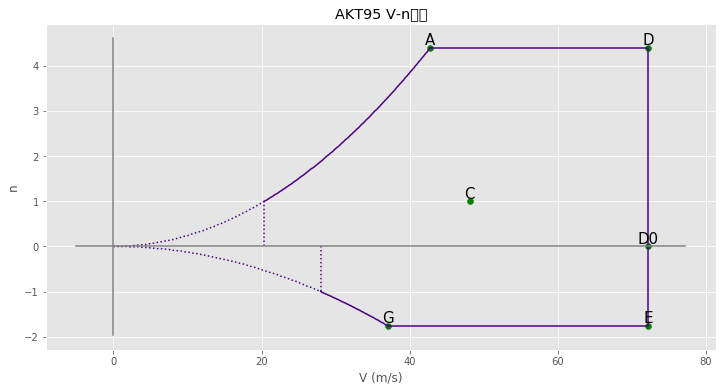

In [4]:
#V-n線図作成
plt.style.use('ggplot')

fig,ax = plt.subplots(figsize=(12,6))


# O-Vs
v = np.linspace(0., cur_cases['pVs']['V'], 100)
n = np.array([calc_n(_v,clmax_p,W,Sw) for _v in v])
ax.plot(v,n,c = 'indigo',ls = ':')

ax.plot([cur_cases['pVs']['V'],cur_cases['pVs']['V']],
        [0.,cur_cases['pVs']['n']]
        ,c = 'indigo',ls = ':')

# Vs-Va
v = np.linspace(cur_cases['pVs']['V'], cur_cases['A']['V'], 100)
n = np.array([calc_n(_v,clmax_p,W,Sw) for _v in v])
ax.plot(v,n,c = 'indigo',ls = '-')

#直線部
ax.plot([cur_cases['A']['V'],cur_cases['D']['V'],cur_cases['E']['V'],cur_cases['G']['V']],
        [cur_cases['A']['n'],cur_cases['D']['n'],cur_cases['E']['n'],cur_cases['G']['n']]
        ,c = 'indigo',ls = '-')

# O-負失速
v = np.linspace(0., cur_cases['nVs']['V'], 100)
n = np.array([calc_n(_v,clmax_n,W,Sw) for _v in v])
ax.plot(v,n,c = 'indigo',ls = ':')

ax.plot([cur_cases['nVs']['V'],cur_cases['nVs']['V']],
        [0.,cur_cases['nVs']['n']]
        ,c = 'indigo',ls = ':')

# 負失速-Vg
v = np.linspace(cur_cases['nVs']['V'], cur_cases['G']['V'], 100)
n = np.array([calc_n(_v,clmax_n,W,Sw) for _v in v])
ax.plot(v,n,c = 'indigo',ls = '-')

#タイトル等設定
ax.set_title('AKT95 V-n線図',fontname='IPAexGothic')
ax.set_xlabel('V (m/s)')
ax.set_ylabel('n')

for _c in ('A','D','D0','C','G','E'):
    ax.text(cur_cases[_c]['V'],cur_cases[_c]['n'],_c,fontsize = 15,ha ='center',va='bottom')
    ax.scatter(cur_cases[_c]['V'],cur_cases[_c]['n'],c='green')

ax.plot((-5,cur_cases['D']['V']+5),(0,0),c='grey')
ax.plot((0,0),(cur_cases['G']['n']-.2,cur_cases['A']['n']+.2),c='grey')

plt.show()
fig.savefig('v-n線図.png')

In [5]:
#結果をCSVファイルに出力
from datetime import datetime

df=pd.DataFrame([pd.Series(cur_cases[_c]) for _c in cur_cases.keys()],index=cur_cases.keys())

cur_dt = datetime.now().strftime('%Y%m%d-%H%M%S')
out_file_name = 'AKT95 V-n線図'+ cur_dt + '.csv'

df.to_csv(out_file_name)

In [6]:
#カラム名を単位付きに変更して表示
df.columns=['CL','V(m/s)','n']
df

,CL,V(m/s),n
A,4.40,1.50,42.8
D,4.40,0.53,72.2
D0,0.00,0.00,72.2
G,-1.76,-0.80,37.1
E,-1.76,-0.21,72.2
C,1.00,0.27,48.1
pVs,1.00,1.50,20.4
nVs,-1.00,-0.80,28.0


In [7]:
#結果をJSON形式で出力
import json
out_file_name = 'AKT95 V-n線図'+ cur_dt + '.json'

with open(out_file_name,'w') as f:
    json.dump(cur_cases,f,indent=4)